C04B21 Dual Energy Carbonate Core CT
====================================

This project is a set of dual energy medical CT scans of 3 ft carbonate core samples, made available by Rodolfo Victor at [Digital Rocks Portal](https://www.digitalrocksportal.org/), 
acquired with (0.488 X 0.488 X 1.25) mm voxel length at Petrobras Research Center. We will download the 
vuggy C04B21 sample. 

.. note:: 
   If you plan to use this data, please remember to [cite the data](https://www.digitalrocksportal.org/projects/102/cite/)
   and the
   [related publications](https://www.digitalrocksportal.org/projects/102/publications/).



Go to the Dual-energy medical CT in carbonate rocks project in the Digital Rocks Portal:
https://www.digitalrocksportal.org/projects/102. Click on the low-energy image `C04B21_Raw100keV`.

<img src="import_C04B21_dualenergy-img1.jpg" width="250"/>
 
Pay attention to the metadata! We'll need it later. An extra piece of information: this is [ImageJ/Fiji](https://fiji.sc/) exported raw data, so it is in Fortran file order.
Click `Action->Download File`.

<img src="import_C04B21_dualenergy-img2.jpg" width="250"/>

Repeat the procedure and download the high-energy image `C04B21_Raw140keV`.

Let's import the raw files into RockVerse. In this example we'll use 8 chunks by halving the number of voxels in each direction:

In [1]:
import rockverse as rv

C04B21_Raw100keV =  rv.voxel_image.import_raw(
    rawfile='/path/to/rawdata/dual_energy_carbonate/C04B21Raw100keV.raw',
    store='/path/to/imported/dual_energy_carbonate/C04B21Raw100keV',
    shape=(512, 512, 738),               #<- From metadata, image size
    chunks=(256, 256, 369),              #<- Our choice of chunk size will give a 2x2x2 chunk grid
    dtype='<i2',                         #<- From metadata, little-endian 16-bit signed integer
    offset=0,                            #<- From metadata
    voxel_length=(0.488, 0.488, 1.25),   #<- From metadata
    voxel_unit='mm',                     #<- From metadata
    raw_file_order='F',                  #<- Fortran file order
    field_name='Low attenuation',            #<- Our choice for field name (X-ray attenuation)
    field_unit='H.U.',                   #<- field units (Hounsfield units)
    description='Low energy X-ray CT attenuation',
    overwrite=True                       #<- Overwrite if file exists in disk
    )

C04B21_Raw140keV =  rv.voxel_image.import_raw(
    rawfile='/path/to/rawdata/dual_energy_carbonate/C04B21Raw140keV.raw',
    store='/path/to/imported/dual_energy_carbonate/C04B21Raw140keV',
    shape=(512, 512, 738),               #<- From metadata, image size
    chunks=(256, 256, 369),              #<- Our choice of chunk size will give a 2x2x2 chunk grid
    dtype='<i2',                         #<- From metadata, little-endian 16-bit signed integer
    offset=0,                            #<- From metadata
    voxel_length=(0.488, 0.488, 1.25),   #<- From metadata
    voxel_unit='mm',                     #<- From metadata
    raw_file_order='F',                  #<- Fortran file order
    field_name='High attenuation',            #<- Our choice for field name (X-ray attenuation)
    field_unit='H.U.',                   #<- field units (Hounsfield units)
    description='High energy X-ray CT attenuation',
    overwrite=True                       #<- Overwrite if file exists in disk
    )

[2025-01-09 12:31:54] (Low attenuation) Importing raw file: 100%|>>>>>>>>>>| 8/8 [00:04<00:00,  1.68chunk/s]
[2025-01-09 12:31:59] (High attenuation) Importing raw file: 100%|>>>>>>>>>>| 8/8 [00:06<00:00,  1.25chunk/s]


The images are now available as a RockVerse voxel image in disk, at the path given in the ``store`` parameters. 
Lets do a quick visualization:

[2025-01-09 12:32:06] Histogram Low attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 20.36chunk/s]
[2025-01-09 12:32:06] Histogram Low attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:03<00:00,  2.25chunk/s]
[2025-01-09 12:32:12] Histogram High attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 21.73chunk/s]
[2025-01-09 12:32:12] Histogram High attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:02<00:00,  2.68chunk/s]


<Figure size 1000x400 with 0 Axes>

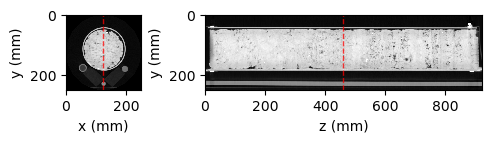

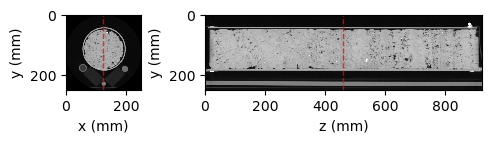

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(layout='constrained', figsize=(10, 4))
subfigs = fig.subfigures(2, 1, wspace=0.07)
viewer_low = rv.OrthogonalViewer(C04B21_Raw100keV,
                                 show_xz_plane=False,
                                 show_histogram=False,
                                 image_dict={'clim': (-1200, 4000)}
                                 )
viewer_high = rv.OrthogonalViewer(C04B21_Raw140keV,
                                 show_xz_plane=False,
                                 show_histogram=False,
                                 image_dict={'clim': (-1200, 4000)},
                                 )